# 1. Importes de bibliotecas

In [1]:
import pandas as pd
import missingno as msno
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Configurar Pandas para mostrar todas as colunas
pd.set_option('display.max_columns', None)



2024-09-25 02:09:44.603593: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-25 02:09:44.604160: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-25 02:09:44.606377: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-25 02:09:44.612901: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-25 02:09:44.623828: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

# 2. Carregando o dataframe tratado

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/leandric/DATATHON-FIAP/refs/heads/main/data/base_tratada.csv')

In [3]:
df.head()

,INSTITUICAO_ENSINO_ALUNO,IDADE_ALUNO,ANOS_PM,FASE_TURMA,PONTO_VIRADA,INDE,INDE_CONCEITO,PEDRA,DESTAQUE_IEG,DESTAQUE_IDA,DESTAQUE_IPV,IAA,IEG,IPS,IDA,IPP,IPV,IAN,NOME,ano,FASE,TURMA,SINALIZADOR_INGRESSANTE,REC_EQUIPE_1,REC_EQUIPE_2,REC_EQUIPE_3,REC_EQUIPE_4,NIVEL_IDEAL,DEFASAGEM,ANO_INGRESSO,BOLSISTA,CG,CF,CT,NOTA_PORT,NOTA_MAT,NOTA_ING,QTD_AVAL,REC_AVA_1,REC_AVA_2,REC_AVA_3,REC_AVA_4,INDICADO_BOLSA
0,Escola Pública,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,ALUNO-1,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALUNO-2,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Escola Pública,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,ALUNO-3,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,ALUNO-4,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Escola Pública,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10,ALUNO-5,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Limpando o dataframe e selecionando as variaveis de interesse

<Axes: >

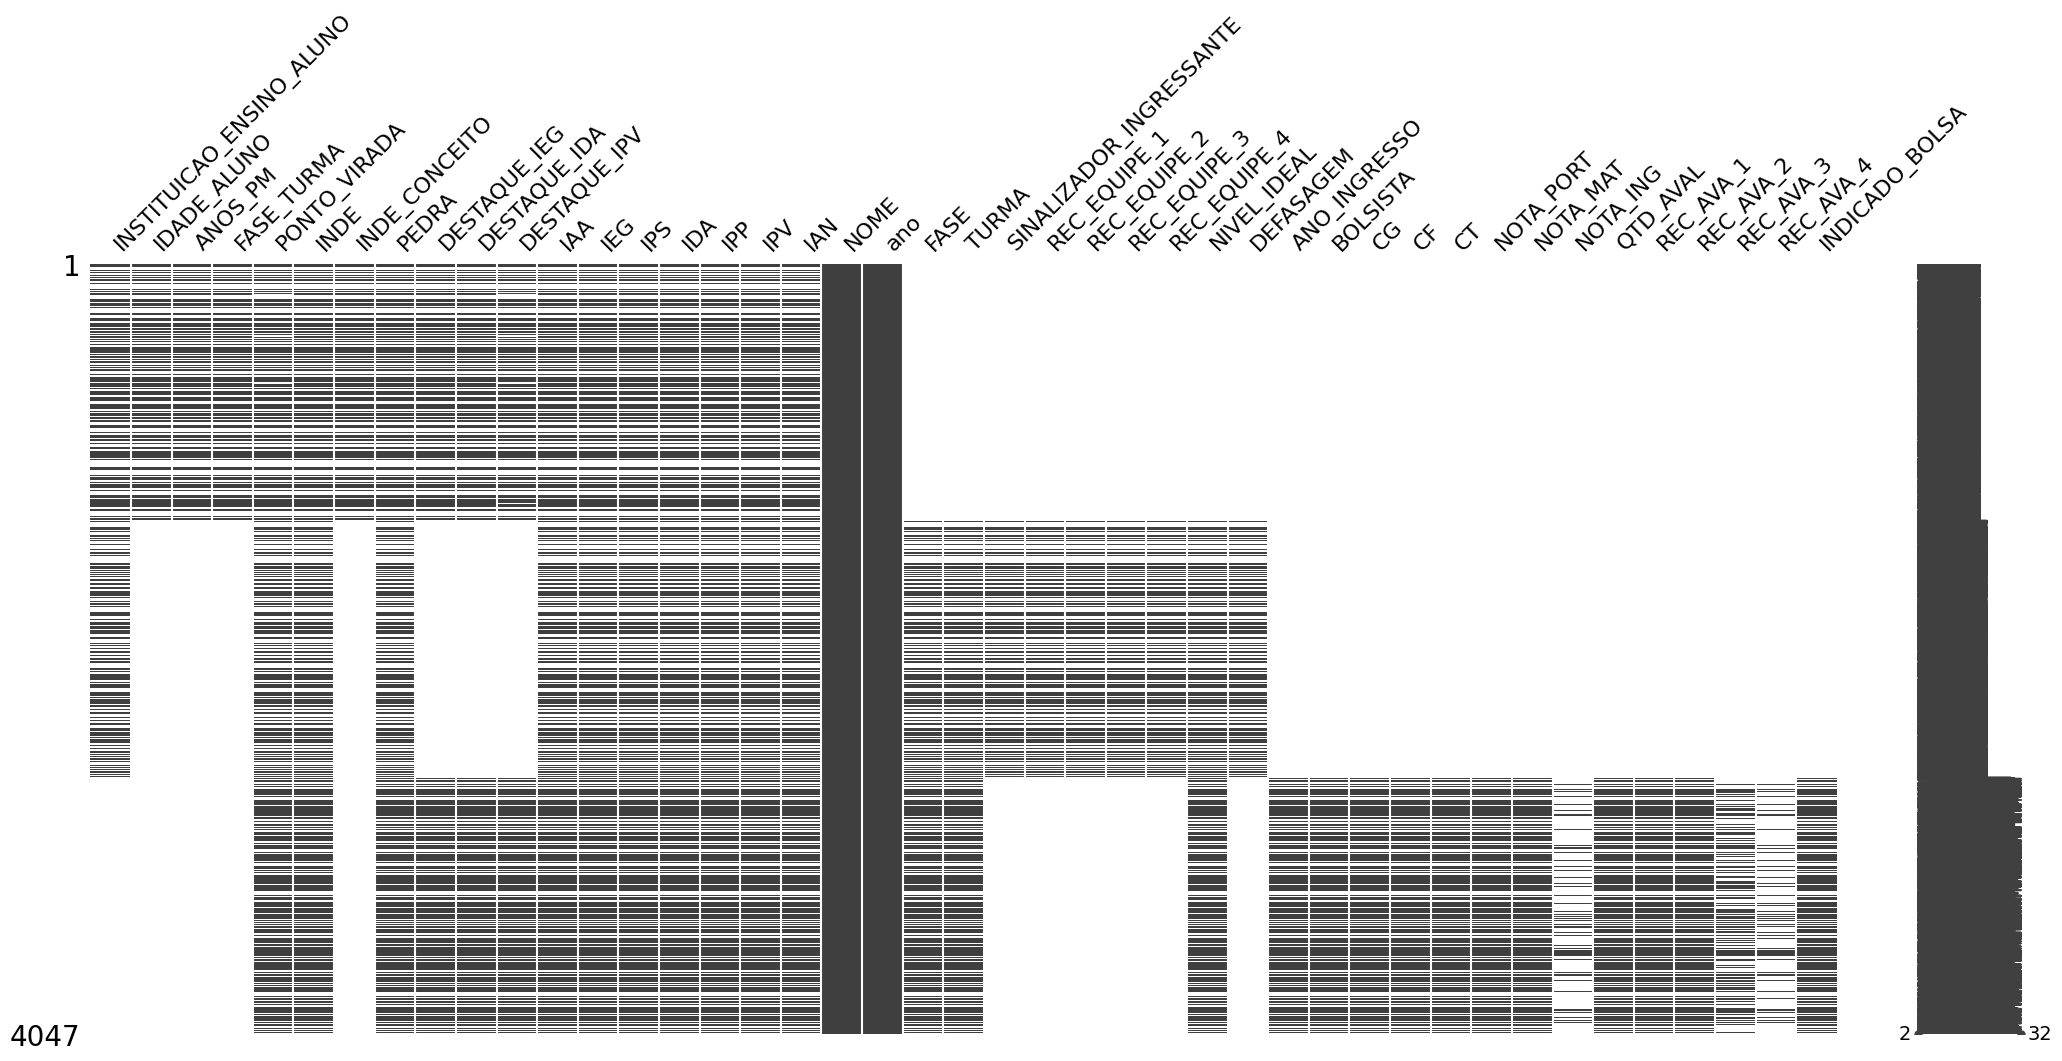

In [4]:
msno.matrix(df)

Analisando a base de dados, notamos a presença de diversos valores nulos em várias colunas. Como nosso objetivo é treinar um modelo de deep learning, é fundamental garantir a consistência dos dados. Por isso, decidimos manter apenas as colunas selecionadas para o desenvolvimento do modelo, descartando as colunas ou linhas que não apresentavam os dados necessários.

## 3.1 Selecionando colunas

### Explicação das Colunas

 1. **NOME**
   - **Descrição**: Nome do aluno (os dados estão anonimizados).
   - **Tipo**: Texto (string).
   - **Observação**: Utilizado para identificar individualmente cada aluno. Como os dados são anonimizados, pode ser um ID ou código representando o nome real do aluno.

 2. **ano**
   - **Descrição**: O ano referente ao registro de métricas do aluno.
   - **Tipo**: Numérico (inteiro).
   - **Observação**: Representa o ano de coleta dos dados (2020, 2021, 2022, etc.).

 3. **INDE**
   - **Descrição**: Índice de Desenvolvimento Educacional (INDE), que é uma métrica de avaliação geral do aluno.
   - **Tipo**: Numérico (decimal).
   - **Observação**: Calculado através da ponderação de vários indicadores de desempenho (IAN, IDA, IEG, IAA, IPS, IPP, IPV). Avalia o progresso educacional geral do aluno.

 4. **PEDRA**
   - **Descrição**: Classificação do aluno com base no valor do INDE.
   - **Tipo**: Categórico (Quartzo, Ágata, Ametista, Topázio).
   - **Faixas de INDE**:
     - Quartzo: 2.405 a 5.506
     - Ágata: 5.506 a 6.868
     - Ametista: 6.868 a 8.230
     - Topázio: 8.230 a 9.294
   - **Observação**: Classificação qualitativa que agrupa alunos em categorias baseadas em seu desempenho educacional.

 5. **IEG**
   - **Descrição**: Indicador de Engajamento (IEG) do aluno.
   - **Tipo**: Numérico (decimal).
   - **Observação**: Mede o nível de engajamento do aluno, geralmente baseado na participação, interesse e envolvimento em atividades escolares.

 6. **IPS**
   - **Descrição**: Indicador Psicossocial (IPS) do aluno.
   - **Tipo**: Numérico (decimal).
   - **Observação**: Avalia o estado psicossocial do aluno, incluindo aspectos como interação social, bem-estar emocional, e comportamento.

 7. **IPP**
   - **Descrição**: Indicador Psicopedagógico (IPP) do aluno.
   - **Tipo**: Numérico (decimal).
   - **Observação**: Avalia o desenvolvimento psicopedagógico do aluno, medindo aspectos relacionados ao suporte psicopedagógico, habilidades cognitivas, e processo de aprendizado.

 8. **IDA**
   - **Descrição**: Indicador de Aprendizagem (IDA) do aluno.
   - **Tipo**: Numérico (decimal).
   - **Observação**: Avalia o progresso e a qualidade do aprendizado do aluno, com base em suas notas e desempenho acadêmico ao longo do ano.

 9. **IAA**
   - **Descrição**: Indicador de Autoavaliação (IAA) do aluno.
   - **Tipo**: Numérico (decimal).
   - **Observação**: Média das notas de autoavaliação do aluno, refletindo como ele próprio avalia seu desempenho e desenvolvimento.

 10. **IAN**
   - **Descrição**: Indicador de Adequação ao Nível (IAN).
   - **Tipo**: Numérico (decimal).
   - **Observação**: Avalia se o aluno está adequado ao nível de aprendizado esperado para sua idade ou fase escolar.

 11. **PONTO_VIRADA**
   - **Descrição**: Indica se o aluno atingiu o ponto de virada em seu desenvolvimento educacional.
   - **Tipo**: Booleano (1 = Atingiu o ponto de virada, 0 = Não atingiu).
   - **Observação**: O "Ponto de Virada" representa um marco significativo no desenvolvimento do aluno, indicando uma melhora ou progresso notável em seu aprendizado ou comportamento.


In [5]:
columns = [
    'NOME',
    'ano',
    'INDE',
    'PEDRA',    
    'IEG',
    'IPS',
    'IPP',
    'IDA',
    'IAA' ,
    'IAN',
    'PONTO_VIRADA'
]

In [6]:
# Deletar as linhas que têm NaN na coluna 'PONTO_VIRADA'
df = df.dropna(subset=['PONTO_VIRADA'])

In [7]:
df = df[columns].copy()
df.head()

,NOME,ano,INDE,PEDRA,IEG,IPS,IPP,IDA,IAA,IAN,PONTO_VIRADA
0,ALUNO-1,2020,7.883752,Ametista,8.7,7.5,5.9375,7,8.500020000000001,10,Não
2,ALUNO-3,2020,7.856389666666666,Ametista,8.9,7.5,8.125,5.5,7.91667,10,Não
3,ALUNO-4,2020,5.076252,Quartzo,4.1,6.875,7.1875,0,8.000020000000001,5,Não
4,ALUNO-5,2020,8.077085,Ametista,8,7.5,8.4375,7.5,7.50002,10,Não
7,ALUNO-8,2020,8.381390666666666,Ametista,9.9,4.375,8.749999999999998,7.333333333333333,8.33334,10,Sim


<Axes: >

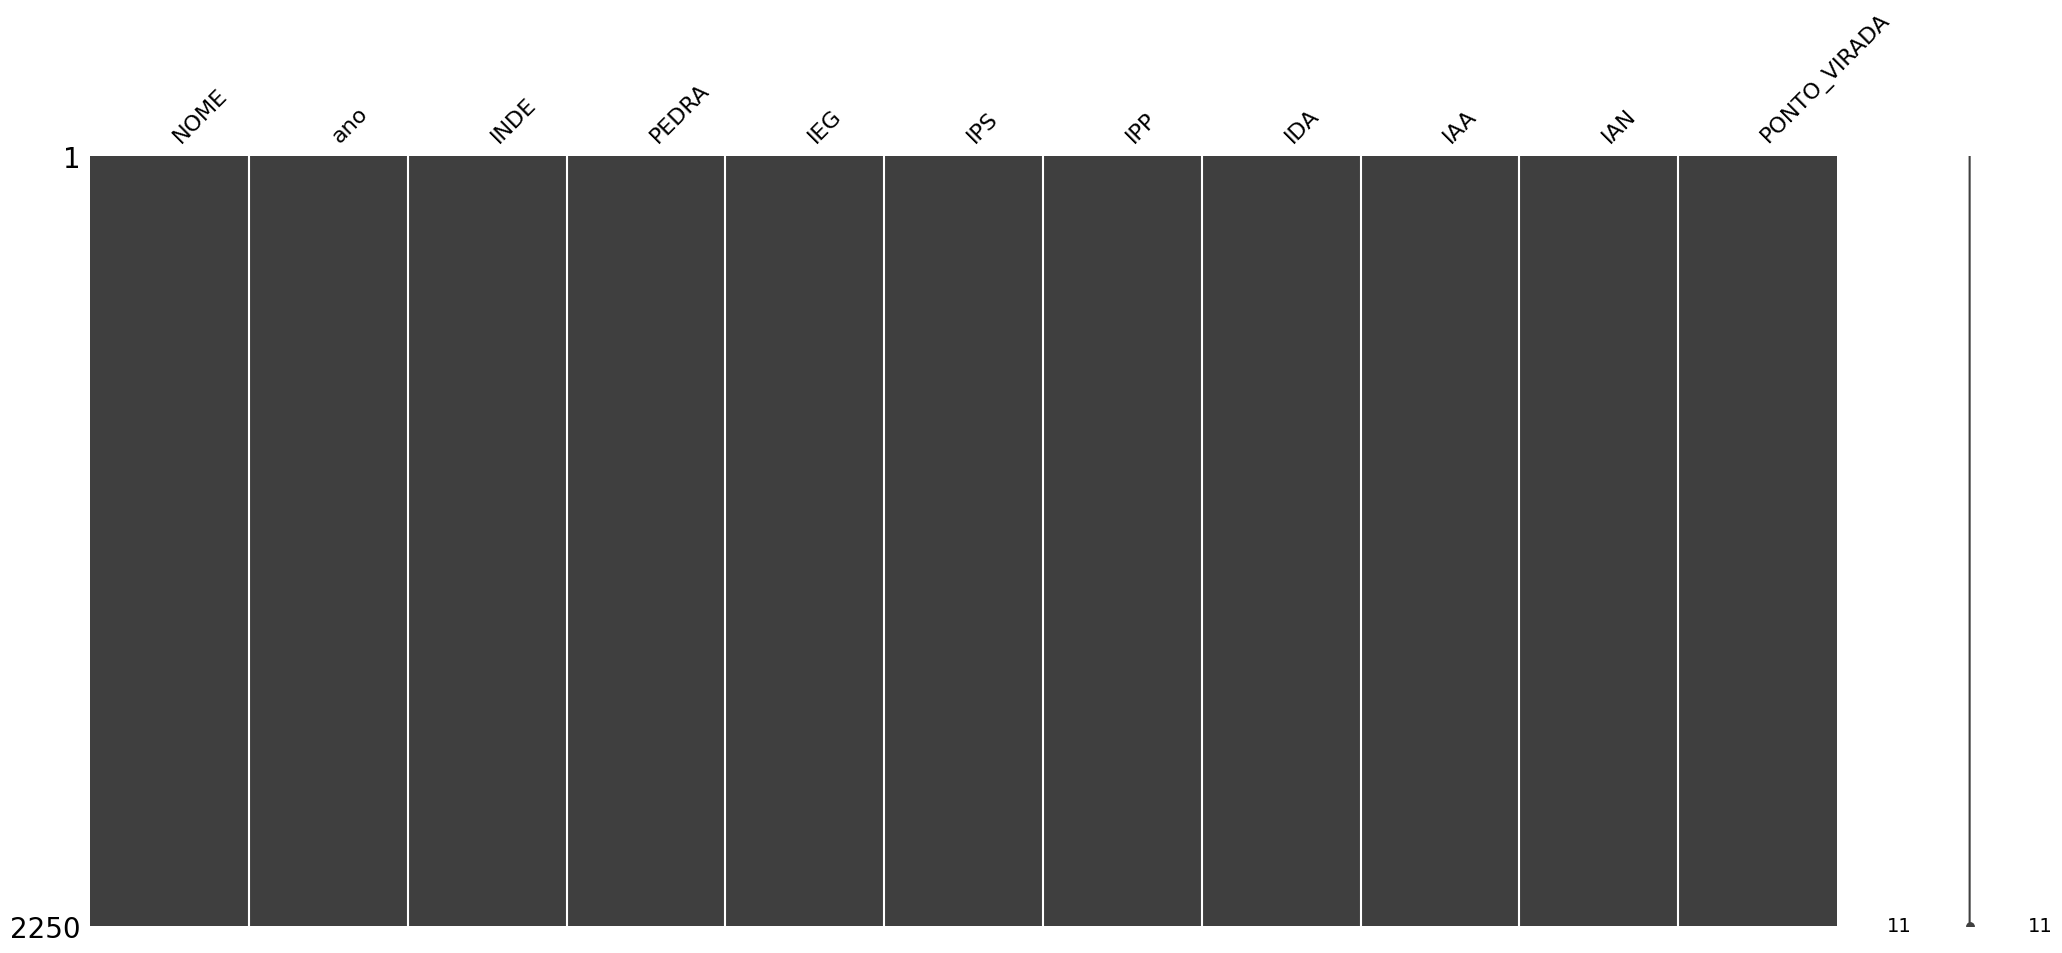

In [8]:

msno.matrix(df[columns])

## 3.2 Visualizando as classes Target

In [9]:
df['PONTO_VIRADA'].value_counts()

PONTO_VIRADA
Não       1932
Sim        315
#NULO!       2
D9600        1
Name: count, dtype: int64

é possível notar um desbalanceamento nas classes alem de 3 valores divergentes

In [10]:
df = df[(df['PONTO_VIRADA'] == 'Sim') | (df['PONTO_VIRADA'] == 'Não')].copy()
df['PONTO_VIRADA'].value_counts()

PONTO_VIRADA
Não    1932
Sim     315
Name: count, dtype: int64

# 4. Modelando a base para o treinamento

In [11]:
# Matriz preditora 
X = df[['INDE', 'PEDRA', 'IEG', 'IPS', 'IPP', 'IDA', 'IAA', 'IAN']]
X.head()

,INDE,PEDRA,IEG,IPS,IPP,IDA,IAA,IAN
0,7.883752,Ametista,8.7,7.5,5.9375,7,8.500020000000001,10
2,7.856389666666666,Ametista,8.9,7.5,8.125,5.5,7.91667,10
3,5.076252,Quartzo,4.1,6.875,7.1875,0,8.000020000000001,5
4,8.077085,Ametista,8,7.5,8.4375,7.5,7.50002,10
7,8.381390666666666,Ametista,9.9,4.375,8.749999999999998,7.333333333333333,8.33334,10


In [12]:
# Preditor
y = df['PONTO_VIRADA']
y.value_counts()

PONTO_VIRADA
Não    1932
Sim     315
Name: count, dtype: int64

## 4.1 Tratando colunas texto com LabelEncoder()

In [13]:
label_encoder = LabelEncoder()
X['PEDRA'] = label_encoder.fit_transform(X['PEDRA'])

In [14]:
X['PEDRA'].value_counts()

PEDRA
0    970
3    591
1    368
2    318
Name: count, dtype: int64

## 4.2 Tratando a variável y

In [15]:
y = y.map({'Não': 0, 'Sim': 1})
y.value_counts()

PONTO_VIRADA
0    1932
1     315
Name: count, dtype: int64

## 4.3 Normalizando a base preditora X

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.68463911, -0.98644369,  0.54992201, ...,  0.44162907,
         0.11793528,  1.2600625 ],
       [ 0.66179095, -0.98644369,  0.64384636, ..., -0.1761427 ,
        -0.17172407,  1.2600625 ],
       [-1.65968702, -0.18826617, -1.61033807, ..., -2.44130583,
        -0.13033707, -0.74160625],
       ...,
       [ 0.89488594,  0.60991135,  0.70576076, ...,  1.26532475,
         0.36620763, -0.74160625],
       [-0.26208574,  1.40808887,  0.77441544, ..., -0.01140356,
         0.03517121, -0.74160625],
       [-0.55458774,  1.40808887,  0.00521425, ..., -0.58799054,
        -0.17172407, -0.74160625]])

## 4.4 Dividindo dados de Treino e Teste

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=64, stratify=y)

# 5. Construindo o Modelo

In [18]:
# Definir pesos para as classes com base na proporção do dataset
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
# Convertendo para dicionário para uso no modelo
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict

{0: 0.5815533980582525, 1: 3.5654761904761907}

# 5.1 Definindo modelo

In [19]:
model = Sequential()

## 5.2 Construindo a rede

In [20]:
# Primeira camada densa
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # X_train deve ter 2 dimensões: (n_amostras, n_features)
model.add(Dropout(0.2))  # Regularização para evitar overfitting

I0000 00:00:1727240986.959605  100287 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-25 02:09:46.959989: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [21]:
# Camada de saída com ativação sigmoid
model.add(Dense(1, activation='sigmoid'))

## 5.3 Compilando o modelo

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

# 5.4 Treinando o a rede

In [24]:
y_train = y_train.values
historico = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,class_weight=class_weight_dict)

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.6410 - accuracy: 0.4560 - loss: 0.7081 - val_AUC: 0.8339 - val_accuracy: 0.6778 - val_loss: 0.5924
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8454 - accuracy: 0.6783 - loss: 0.5348 - val_AUC: 0.8536 - val_accuracy: 0.6639 - val_loss: 0.5501
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8585 - accuracy: 0.7012 - loss: 0.5102 - val_AUC: 0.8593 - val_accuracy: 0.6750 - val_loss: 0.5216
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8831 - accuracy: 0.7230 - loss: 0.4334 - val_AUC: 0.8659 - val_accuracy: 0.6806 - val_loss: 0.5031
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8854 - accuracy: 0.7235 - loss: 0.4425 - val_AUC: 0.8695 - val_accuracy: 0.6944 - val_loss: 0.4865
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8798 - accuracy: 0.7270 - loss: 0.4149 - val_AUC: 0.8713 - val_accuracy: 0.7000 - val_loss: 0.4846
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

# 5.5 Avaliando Resultado

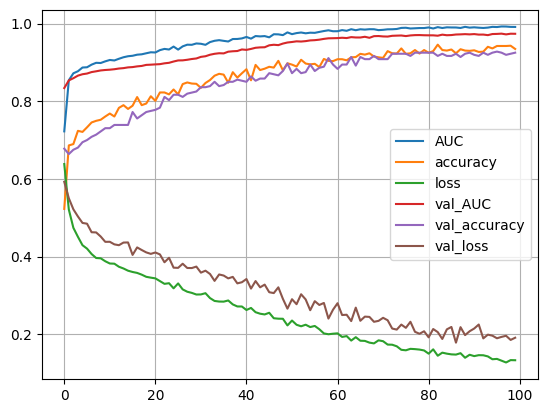

In [25]:

pd.DataFrame(historico.history).plot()
plt.grid()
plt.show()

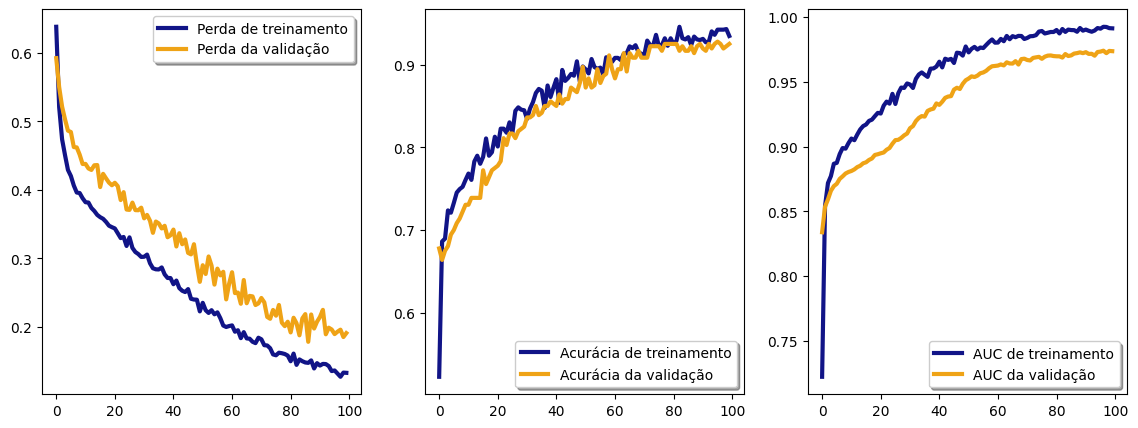

In [26]:
fig, ax = plt.subplots(1, 3,  figsize=(14, 5))
ax[0].plot(historico.history['loss'], color='#111487', linewidth=3, label="Perda de treinamento")
ax[0].plot(historico.history['val_loss'], color='#EFA316', linewidth=3, label="Perda da validação")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(historico.history['accuracy'], color='#111487', linewidth=3, label="Acurácia de treinamento")
ax[1].plot(historico.history['val_accuracy'], color='#EFA316', linewidth=3, label="Acurácia da validação")
legend = ax[1].legend(loc='best', shadow=True)

ax[2].plot(historico.history['AUC'], color='#111487', linewidth=3, label="AUC de treinamento")
ax[2].plot(historico.history['val_AUC'], color='#EFA316', linewidth=3, label="AUC da validação")
legend = ax[2].legend(loc='best', shadow=True)

plt.show()

In [27]:
type(y_train)

numpy.ndarray

In [28]:
# Avaliar no conjunto de teste
y_test = y_test.values
test_loss, test_acc, test_auc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}, Test AUC: {test_auc}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - AUC: 0.9823 - accuracy: 0.9304 - loss: 0.1877
Test loss: 0.18698269128799438, Test accuracy: 0.9377777576446533, Test AUC: 0.9801689982414246
